# Explicação do código

## Importar as librarias

In [1]:
import numpy as np #imports the numpy package which has various tools that help
# Importing standard Qiskit libraries 
from qiskit import QuantumCircuit
from qiskit import Aer 
from qiskit import execute 
from qiskit.visualization import * 
from qiskit.quantum_info import state_fidelity 

Esta primeira parte do código apenas importa as livrarias Importantes para o programa

## Construção do circuito

O elemento básico necessário para o primeiro programa é o QuantumCircuit.

In [2]:
# Create a quantum circuit for 3 qubits 
qc = QuantumCircuit(3) 

Depois de criar o circuito com os seus registos, pode adicionar gates ("operações") para manipular os registos. 

In [3]:
# Add gates 
qc.cnot(0,1) ;

C:\Users\moham\AppData\Local\Temp\ipykernel_9112\4051090467.py:2: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(0,1) ;


Esta parte do código cria um circuito quantico com 3 qubits e adiciona uma X-Gate ou CNOT-Gate tal que o Qubit_0 seja o Qubit de controlo a aplicar no Qubit_1

In [4]:
qc.rz(np.pi/8, 2) 

Estas linhas de código adicionão uma RZ-Gate no Qubit_2

## Visualizar o Circuito

Pode visualizar o seu circuito usando Qiskit, que traça o circuito na forma encontrada em muitos livros de texto.

In [5]:
qc.draw()

q_0: ─────■─────
        ┌─┴─┐   
q_1: ───┤ X ├───
     ┌──┴───┴──┐
q_2: ┤ Rz(π/8) ├
     └─────────┘

## Medições

In [6]:
# Add a measurement to all qubits 
qc.measure_all() 

Estas linhas de código adicionão medições do estado dos Qubits ao circuito quantico

In [7]:
qc.draw()

░ ┌─┐      
   q_0: ─────■──────░─┤M├──────
           ┌─┴─┐    ░ └╥┘┌─┐   
   q_1: ───┤ X ├────░──╫─┤M├───
        ┌──┴───┴──┐ ░  ║ └╥┘┌─┐
   q_2: ┤ Rz(π/8) ├─░──╫──╫─┤M├
        └─────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

C:\ProgramData\anaconda3\envs\qiskit\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


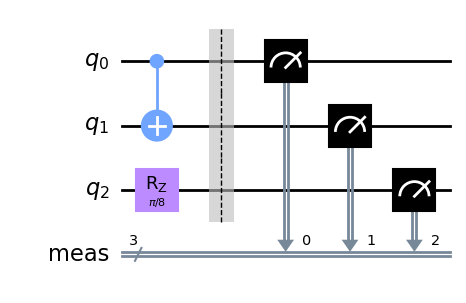

In [8]:
qc.draw(output="mpl")

## Simulação de circuitos usando Qiskit

Qiskit Aer permite a simulação de circuitos quânticos. Fornece vários backends diferentes para a realização de uma simulação.

* qasm_simulador: 
Este simulador suporta múltiplos métodos de simulação e opções configuráveis para cada método de simulação.

* statevector_simulator:
Este simulador retorna o estado quântico que é um vector complexo de dimensões $2^n$ onde $n$ é o número de qubits (por isso tenha cuidado ao usar isto, pois rapidamente se tornará demasiado grande para funcionar na sua máquina).

* unitary_simulator:
Qiskit Aer também inclui um unitary_simulator que funciona desde que todos os elementos do circuito sejam operações unitárias. Este backend calcula a matriz $2^n x 2^n$  representando os gates do circuito quântico.

Os dois últimos simuladores acima são úteis porque fornecem informações sobre o estado de saída pelo circuito ideal e a representação matricial do circuito. No entanto, uma experiência real termina medindo cada bit. Para isso usamos o qasm_simulator.

### Usar Aer's qasm_simulator

In [9]:
qasm_simulator = Aer.get_backend('qasm_simulator') 

C:\Users\moham\AppData\Local\Temp\ipykernel_25572\1800379385.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  qasm_simulator = Aer.get_backend('qasm_simulator')


### Executar o circuito no simulador de qasm.
Definimos o número de repetições do circuito
como 500.

In [10]:
job = execute(qc, qasm_simulator, shots=500) 

C:\Users\moham\AppData\Local\Temp\ipykernel_25572\4225172057.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, qasm_simulator, shots=500)


### Obter os resultados da execução

In [11]:
result = job.result() 

Uma vez que tenha um objecto de resultado, pode aceder às contagens através da função

In [12]:
counts = result.get_counts() 
print("Counts for the basis states:",counts) 

Counts for the basis states: {'000': 500}


100 por cento do tempo o resultado de saída é 000. 

### Visualização dos resultados
Qiskit  também fornece uma função  plot_histogram que lhe permite visualizar os resultados.

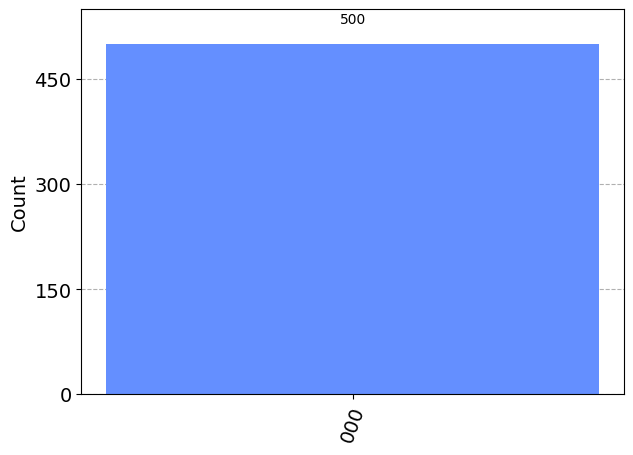

In [13]:
plot_histogram(counts)

# Visualização do estado quântico
Em muitas situações, queremos visualizar o estado quântico. Isto requer recursos exponenciais, só é possível visualizar  o estado de pequenos sistemas quânticos. Existem várias funções para gerar diferentes tipos de visualização de um estado quântico.

## Representar visualmente um Estado de um Qubit
Podemos representar qualquer estado de qubit único na superfície de uma esfera, conhecida como esfera de Bloch

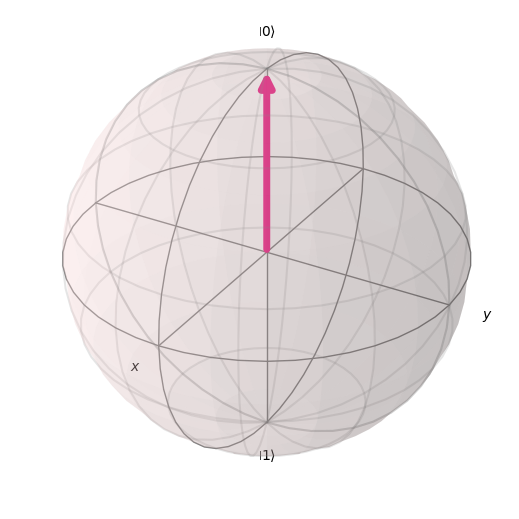

In [14]:
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
coords = [0,0,1] 
plot_bloch_vector(coords) # Bloch Vector 

## outras funções
Podemos ainda usar outras funções (explicarei mais tarde)

* plot_state_city(quantum_state)
* plot_state_paulivec(quantum_state)
* plot_state_qsphere(quantum_state)
* plot_state_hinton(quantum_state)
* plot_bloch_multivector(quantum_state)

In [15]:
from qiskit import BasicAer 
# Create a Quantum Circuit acting on a quantum register of 1 qubits
circuit2 = QuantumCircuit(1)
# execute the quantum circuit 
simulator = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit2, simulator).result()
outputstate = result.get_statevector(circuit2, decimals=3)

C:\Users\moham\AppData\Local\Temp\ipykernel_25572\2201397592.py:1: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer
C:\Users\moham\AppData\Local\Temp\ipykernel_25572\2201397592.py:6: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit2, simulator).result()


In [16]:
print(outputstate)

[1.+0.j 0.+0.j]


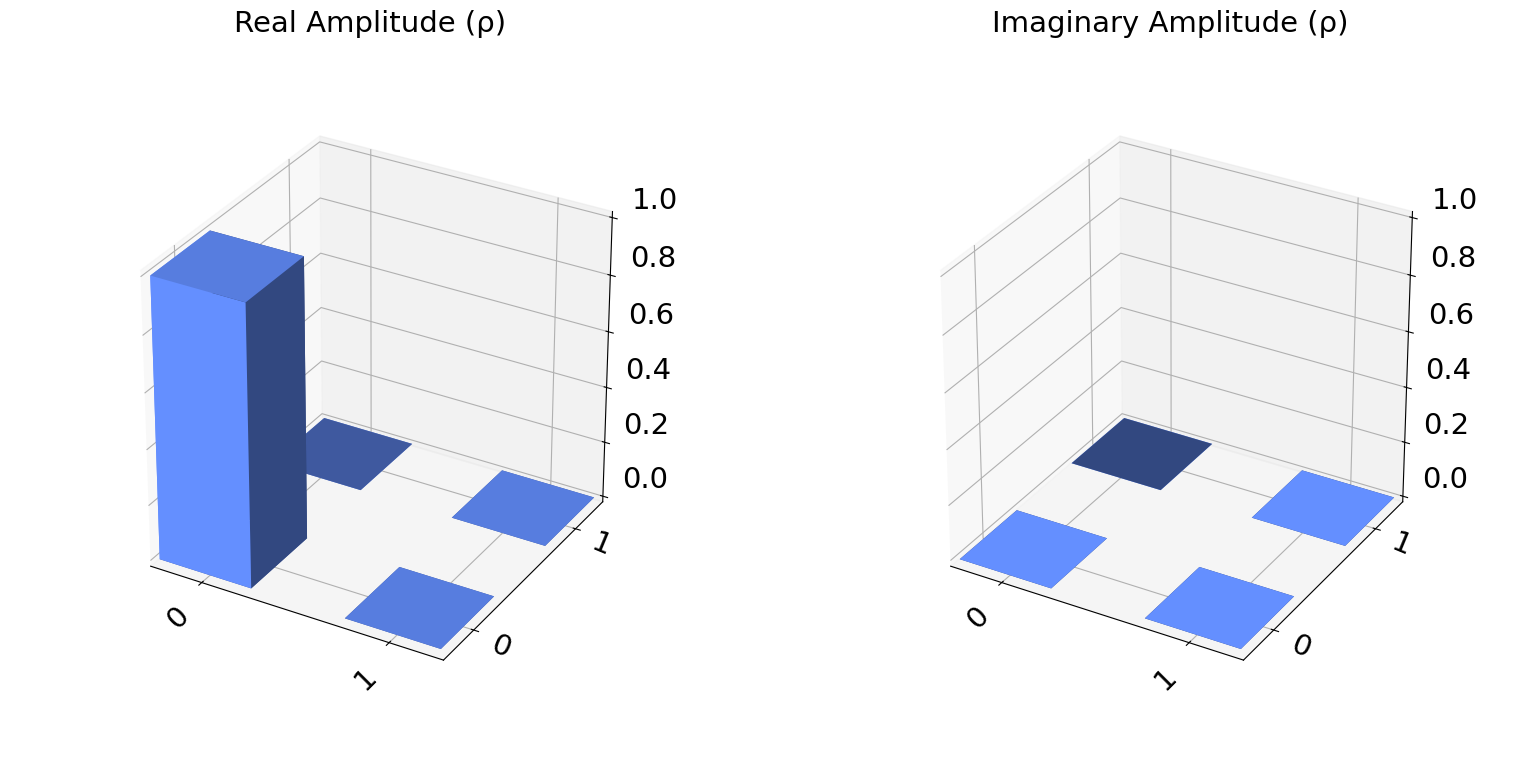

In [17]:
plot_state_city(outputstate)